# Part 1

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ticker = yf.Ticker("SPTL")
data = ticker.history(start="2023-01-01", end="2023-12-31")

# Extract the 'Close' column
sptl = data['Close']

# Format the datetime index to display only the date (YYYY-MM-DD) as a string
sptl.index = pd.to_datetime(sptl.index).strftime('%Y-%m-%d')
sptl

Date
2023-01-03    27.233669
2023-01-04    27.574909
2023-01-05    27.685575
2023-01-06    28.165138
2023-01-09    28.303476
                ...    
2023-12-22    27.541100
2023-12-26    27.588749
2023-12-27    28.055708
2023-12-28    27.874641
2023-12-29    27.655455
Name: Close, Length: 250, dtype: float64

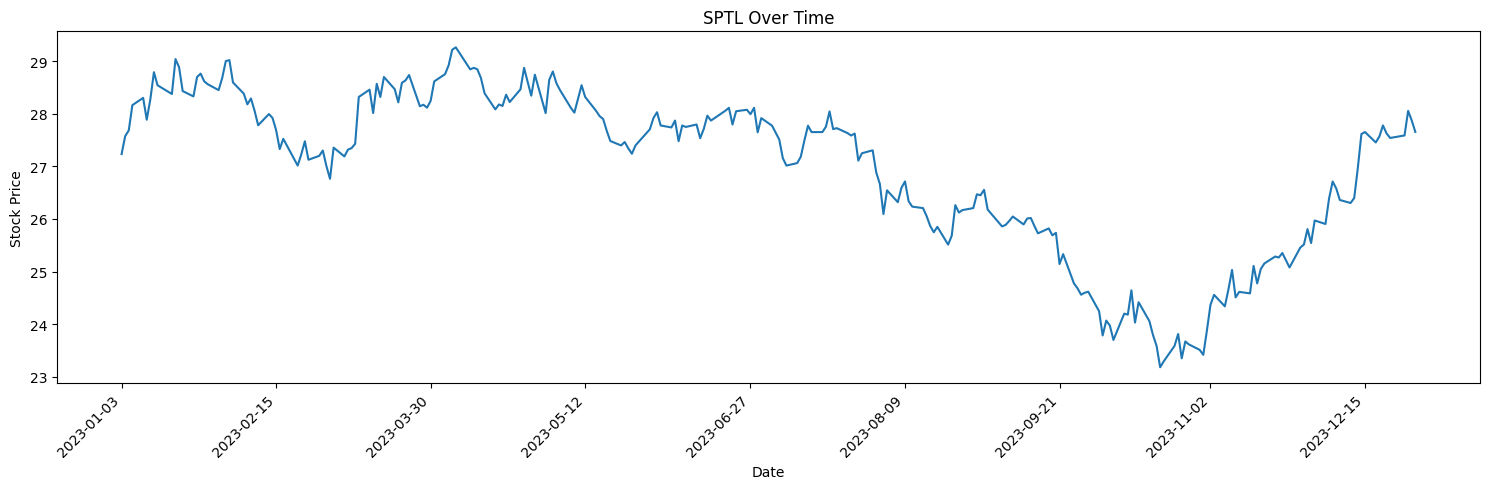

In [3]:
# Make sure the index is in datetime format
sptl_graph = sptl.copy()
sptl_graph.index = pd.to_datetime(sptl_graph.index)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data on the specified axis
sptl_graph.plot(ax=ax)
ax.set_title('SPTL Over Time')
# Set the label for the Y-axis
ax.set_ylabel('Stock Price')

# Set sparse date labels on the X-axis (show one every 30 points)
ax.set_xticks(sptl_graph.index[::30])
ax.tick_params(axis='x', rotation=45)

# Automatically adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
df = pd.read_excel('Search.xlsx')

effr = df[['Effective Date', 'Rate (%)']].copy()
effr

/Users/lucyyang/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Effective Date,Rate (%)
0,12/29/2023,5.33
1,12/28/2023,5.33
2,12/27/2023,5.33
3,12/26/2023,5.33
4,12/22/2023,5.33
...,...,...
245,01/09/2023,4.33
246,01/06/2023,4.33
247,01/05/2023,4.33
248,01/04/2023,4.33


In [5]:
# Convert 'Effective Date' column to datetime format
effr['Effective Date'] = pd.to_datetime(effr['Effective Date'])

# Set 'Effective Date' as the index of the DataFrame
effr.set_index('Effective Date', inplace=True)

# Sort the DataFrame by date in ascending order
effr.sort_index(inplace=True)

# Format the datetime index to 'YYYY-MM-DD' string format
effr.index = effr.index.strftime('%Y-%m-%d')

# Display the final DataFrame
effr = effr.dropna()

effr

,Rate (%)
Effective Date,
2023-01-03,4.33
2023-01-04,4.33
2023-01-05,4.33
2023-01-06,4.33
2023-01-09,4.33
...,...
2023-12-22,5.33
2023-12-26,5.33
2023-12-27,5.33


In [6]:
# Create a new DataFrame with 'sptl' and 'effr'
combine = pd.DataFrame({'SPTL': sptl, 'EFFR': effr['Rate (%)']})

# Display the final DataFrame
combine

,SPTL,EFFR
2023-01-03,27.233679,4.33
2023-01-04,27.574902,4.33
2023-01-05,27.685575,4.33
2023-01-06,28.165140,4.33
2023-01-09,28.303474,4.33
...,...,...
2023-12-22,27.541094,5.33
2023-12-26,27.588749,5.33
2023-12-27,28.055704,5.33
2023-12-28,27.874636,5.33


In [7]:
combine = combine.drop('2023-04-07')
combine.loc['2023-10-09', 'EFFR'] = 5.33
combine

,SPTL,EFFR
2023-01-03,27.233679,4.33
2023-01-04,27.574902,4.33
2023-01-05,27.685575,4.33
2023-01-06,28.165140,4.33
2023-01-09,28.303474,4.33
...,...,...
2023-12-22,27.541094,5.33
2023-12-26,27.588749,5.33
2023-12-27,28.055704,5.33
2023-12-28,27.874636,5.33


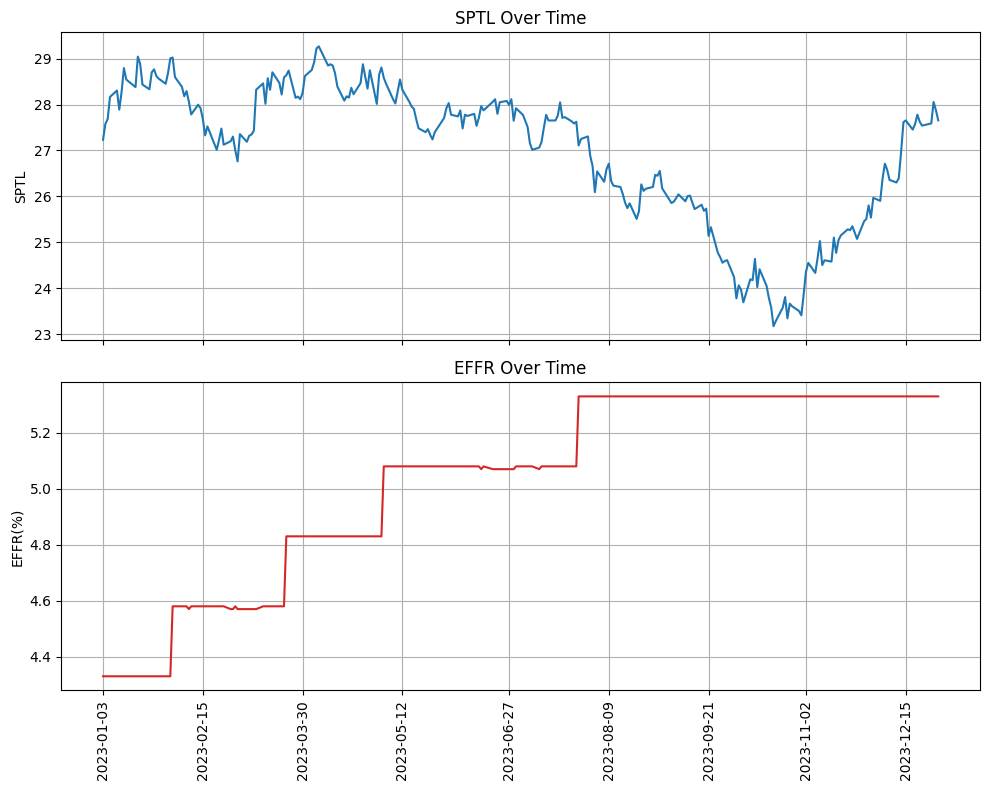

In [8]:
# Ensure the index is datetime type
combine.index = pd.to_datetime(combine.index)

# Create two subplots (2 rows, 1 column), sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# First plot: SPTL
ax1.plot(combine.index, combine['SPTL'], color='tab:blue')
ax1.set_title('SPTL Over Time')
ax1.set_ylabel('SPTL')
ax1.grid(True)

# Second plot: EFFR
ax2.plot(combine.index, combine['EFFR'], color='tab:red')
ax2.set_title('EFFR Over Time')
ax2.set_ylabel('EFFR(%)')
ax2.grid(True)

# Set sparse date labels for the x-axis
ax2.set_xticks(combine.index[::30])  # Show one date label every 30 points
ax2.tick_params(axis='x', rotation=90)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
# Calculate the daily risk-free rate (rf)

# Change from annualized rate to daily rate
# We divide by 100 to convert the percentage rate to a decimal
rf = pd.DataFrame((effr['Rate (%)'] * (1 / 252) /100).rename('risk free rate'))
rf

,risk free rate
Effective Date,
2023-01-03,0.000172
2023-01-04,0.000172
2023-01-05,0.000172
2023-01-06,0.000172
2023-01-09,0.000172
...,...
2023-12-22,0.000212
2023-12-26,0.000212
2023-12-27,0.000212


$$
r_t^e = \frac{\Delta p_t}{p_t} - r_t^f
$$

$$\text{where} \Delta p_t = p_{t+1} - p_t,  r_t^f \text{ is the daily risk-free rate.}$$

In [10]:
# Calculate daily returns of SPTL
sptl_returns = pd.DataFrame(sptl.pct_change().rename('sptl_return').shift(-1))
sptl_returns

,sptl_return
Date,
2023-01-03,0.012529
2023-01-04,0.004014
2023-01-05,0.017322
2023-01-06,0.004912
2023-01-09,-0.014663
...,...
2023-12-22,0.001730
2023-12-26,0.016926
2023-12-27,-0.006454


In [11]:
# Combine SPTL returns and risk-free rate into a single DataFrame
return_df = pd.concat([sptl_returns, rf], axis = 1).dropna()
return_df

,sptl_return,risk free rate
2023-01-03,0.012529,0.000172
2023-01-04,0.004014,0.000172
2023-01-05,0.017322,0.000172
2023-01-06,0.004912,0.000172
2023-01-09,-0.014663,0.000172
...,...,...
2023-12-21,-0.003105,0.000212
2023-12-22,0.001730,0.000212
2023-12-26,0.016926,0.000212
2023-12-27,-0.006454,0.000212


In [12]:
# Compute daily excess returns: SPTL return - risk-free rate
return_df['excess_return'] = return_df['sptl_return'] - return_df['risk free rate']
return_df.index = pd.to_datetime(return_df.index).strftime('%Y-%m-%d')
return_df

,sptl_return,risk free rate,excess_return
2023-01-03,0.012529,0.000172,0.012358
2023-01-04,0.004014,0.000172,0.003842
2023-01-05,0.017322,0.000172,0.017150
2023-01-06,0.004912,0.000172,0.004740
2023-01-09,-0.014663,0.000172,-0.014835
...,...,...,...
2023-12-21,-0.003105,0.000212,-0.003316
2023-12-22,0.001730,0.000212,0.001519
2023-12-26,0.016926,0.000212,0.016714
2023-12-27,-0.006454,0.000212,-0.006665


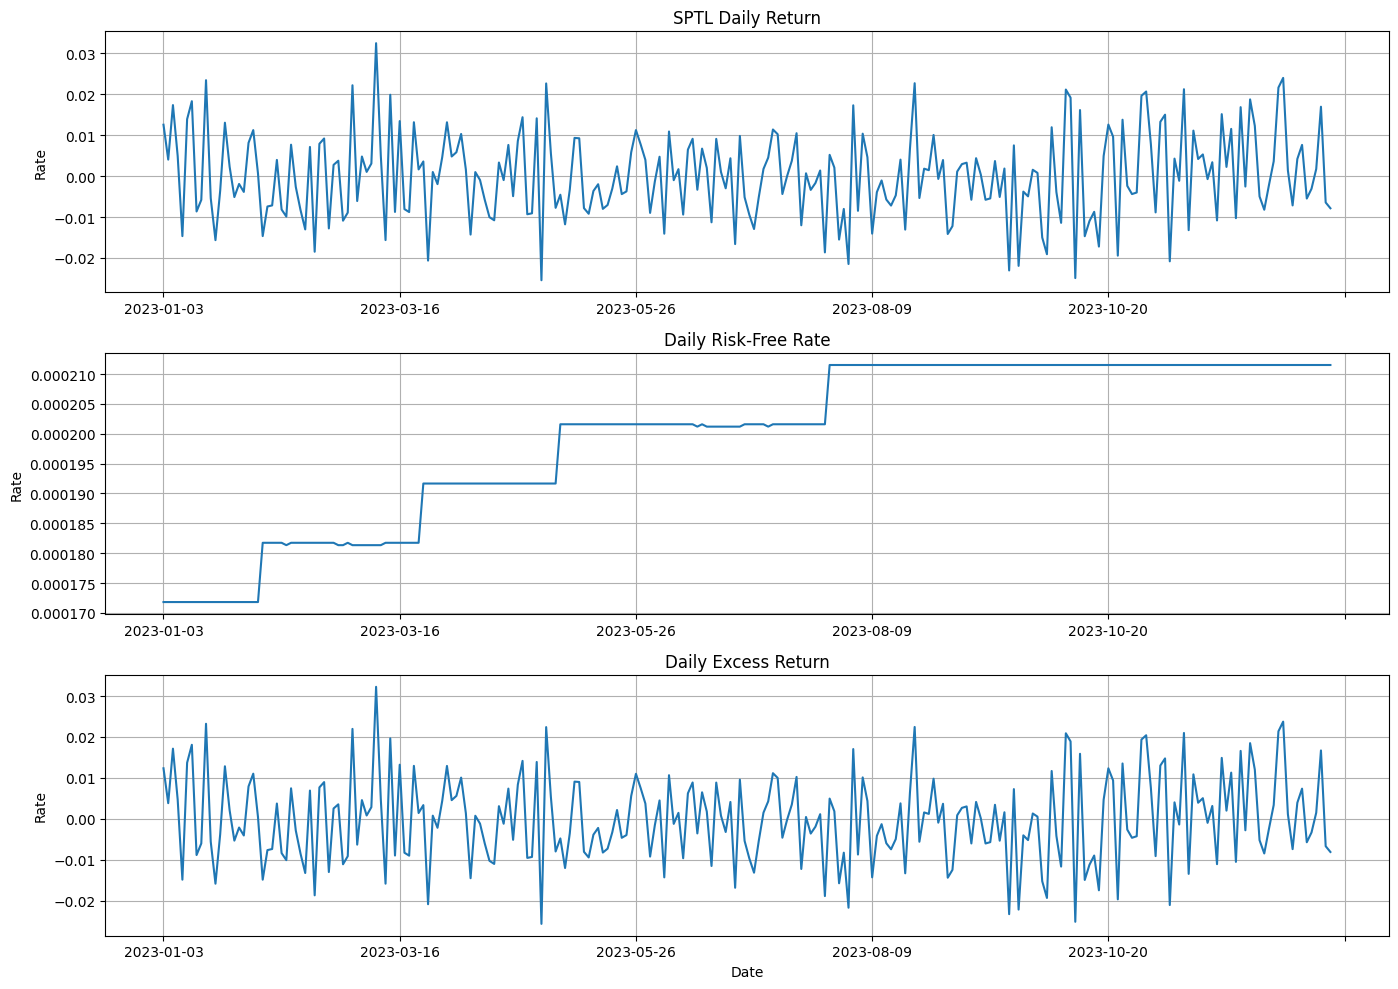

In [13]:
columns = return_df.columns
titles = ['SPTL Daily Return', 'Daily Risk-Free Rate', 'Daily Excess Return']

fig, axes = plt.subplots(3,1, figsize=(14,10))

for i, var in enumerate(columns):
  ax = axes[i]
  return_df[var].plot(ax=ax)
  ax.set_title(titles[i])
  ax.set_ylabel('Rate')
  ax.grid(True)

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

<Axes: >

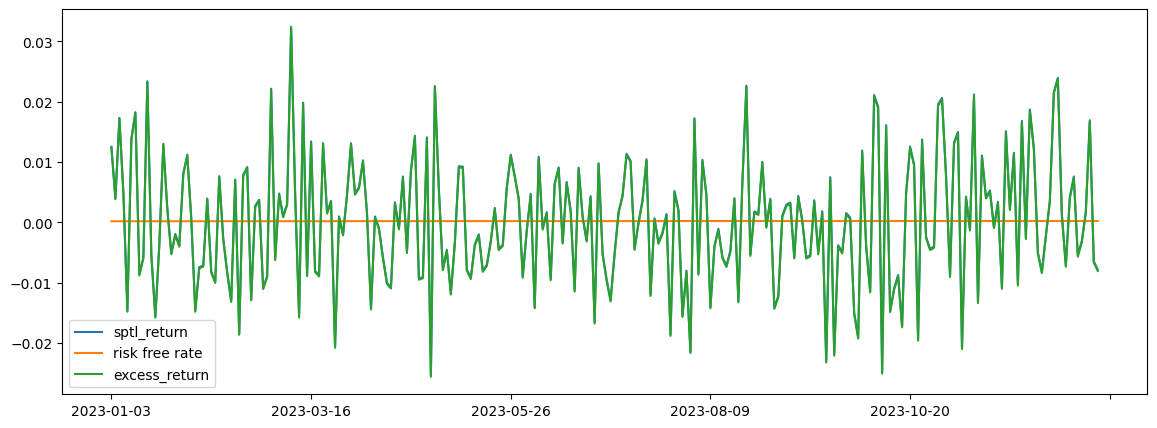

In [14]:
return_df.plot(figsize=(14, 5))

# Part2

In [15]:
L = 10
V0 = 100000

base_df = pd.concat([sptl, return_df[['sptl_return', 'risk free rate', 'excess_return']]], axis=1)
base_df.columns = ['SPTL', 'Daily Return', 'Risk-Free Rate', 'Excess Return']
base_df.dropna(inplace = True)
base_df.head()

,SPTL,Daily Return,Risk-Free Rate,Excess Return
2023-01-03,27.233679,0.012529,0.000172,0.012358
2023-01-04,27.574902,0.004014,0.000172,0.003842
2023-01-05,27.685575,0.017322,0.000172,0.017150
2023-01-06,28.165140,0.004912,0.000172,0.004740
2023-01-09,28.303474,-0.014663,0.000172,-0.014835


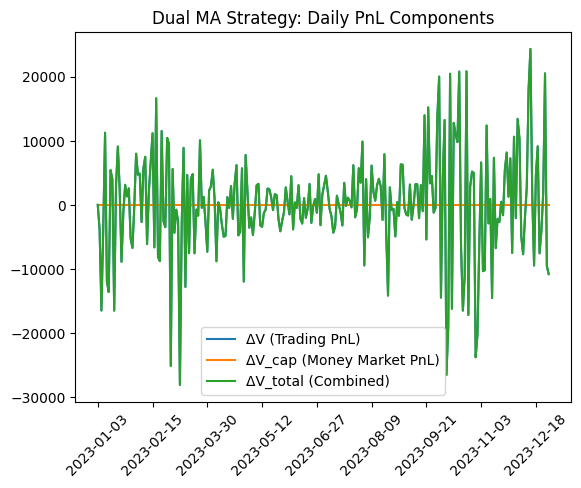

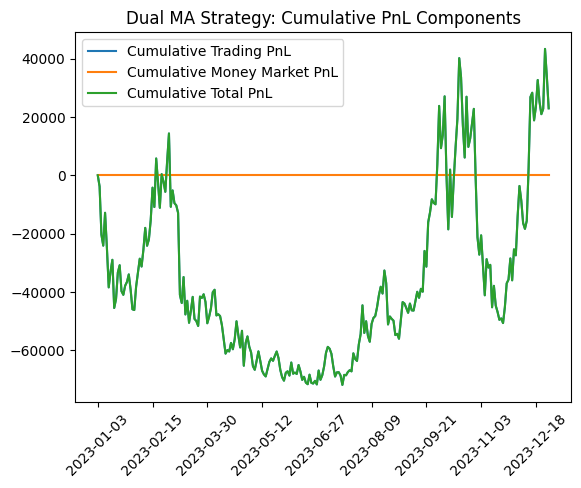

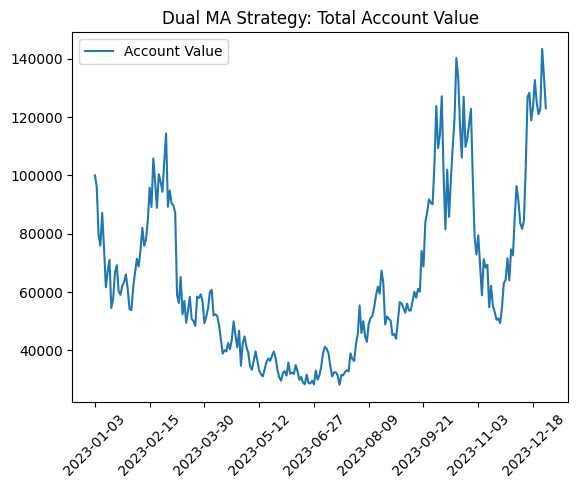

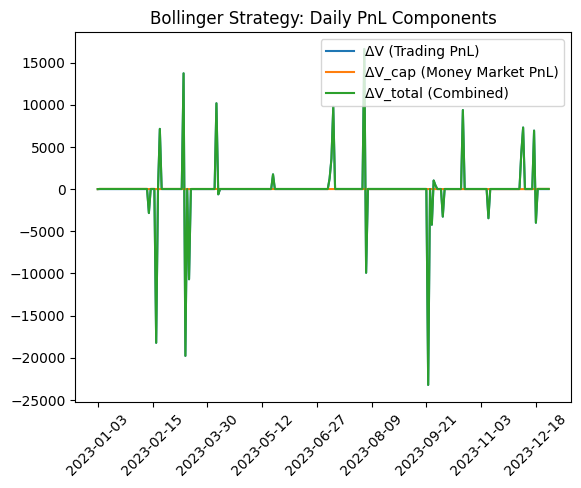

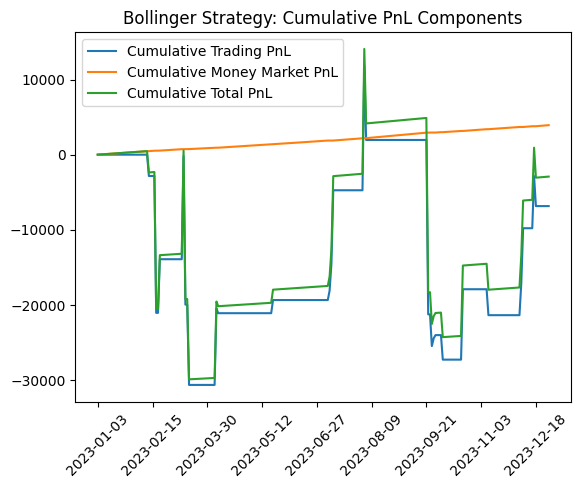

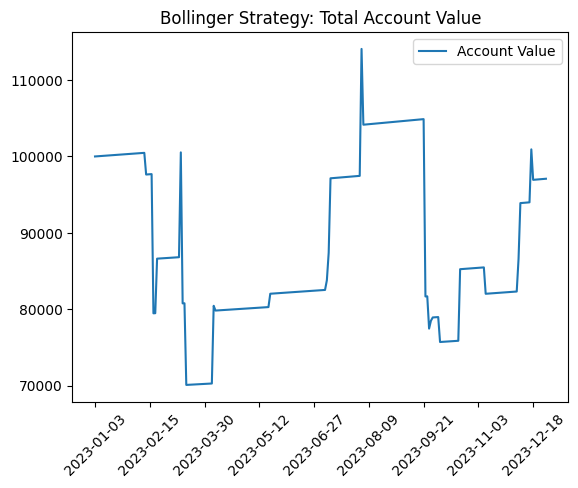

    Strategy  Sharpe Ratio  Calmar Ratio
0    Dual MA      0.972551      2.169573
1  Bollinger      0.224209      0.360034


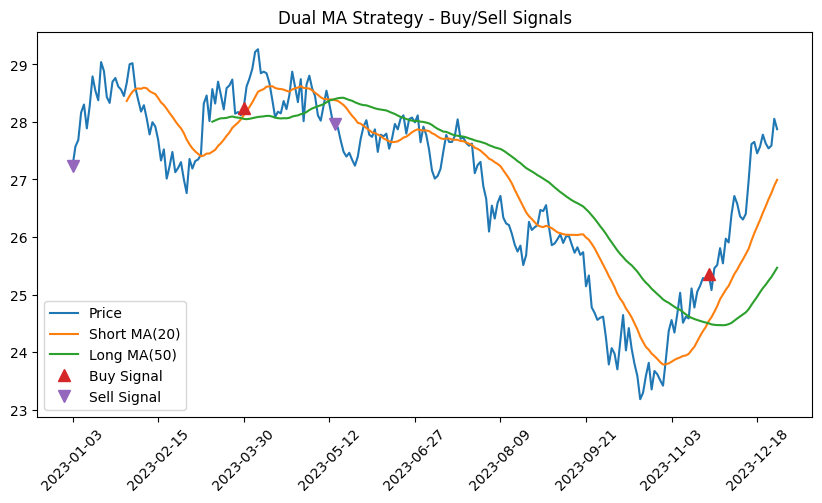

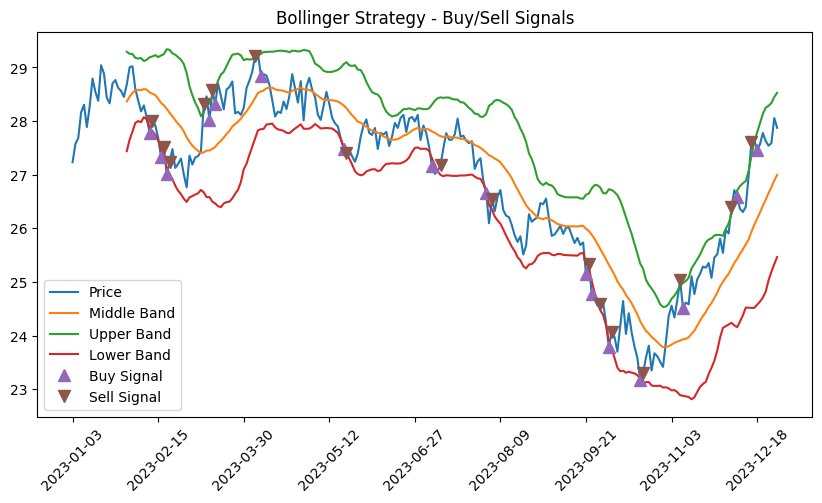

In [16]:
# ==================== 1. Load and prepare data ====================

df = base_df.copy()  # Make a copy to avoid modifying the original

# Extract main series
prices = df['SPTL']                   # Daily asset price
daily_ret = df['Daily Return']        # Daily asset return
rf = df['Risk-Free Rate']            # Daily risk-free rate

# Initial capital and leverage
initial_capital = 100000
leverage = 10

# ==================== 2a. Dual Moving Average Strategy ====================
def dual_ma_signals(prices, short_window=20, long_window=50):
    """
    Generates trend-following signals using two moving averages.
    When the short moving average is above the long moving average => signal +1 (long),
    otherwise => signal -1 (short).
    """
    short_ma = prices.rolling(short_window).mean()
    long_ma = prices.rolling(long_window).mean()
    
    signal_array = np.where(short_ma > long_ma, 1, -1)
    return pd.Series(signal_array, index=prices.index)

df['signal_MA'] = dual_ma_signals(prices, short_window=20, long_window=50)


# ==================== 2b. Bollinger Band Strategy ====================
def bollinger_signals(prices, window=20, num_std=2.0):
    """
    Generates mean-reversion signals based on Bollinger Bands:
    - Price < (mean - num_std * std) => signal +1 (long)
    - Price > (mean + num_std * std) => signal -1 (short)
    - Otherwise => signal 0 (flat). You can customize this logic as needed.
    """
    rolling_mean = prices.rolling(window).mean()
    rolling_std = prices.rolling(window).std()
    
    upper_band = rolling_mean + num_std * rolling_std
    lower_band = rolling_mean - num_std * rolling_std
    
    signal_array = np.zeros(len(prices))
    signal_array[prices < lower_band] = 1
    signal_array[prices > upper_band] = -1
    
    return pd.Series(signal_array, index=prices.index)

df['signal_BB'] = bollinger_signals(prices, window=20, num_std=2.0)


# ==================== 3. Backtest function ====================
def backtest_strategy(df, signal_col):
    """
    Backtests a strategy given a signal column (e.g., 'signal_MA' or 'signal_BB').
    Returns a new DataFrame containing PnL components and account value over time.

    Key formulas:
    - Delta V_t = (price_return_t - r_f_t) * theta_t
    - Delta V_cap_t = (V_{t-1}^total - margin_t) * r_f_t, where margin_t = |theta_t| / L
    - V_t^total = V_{t-1}^total + Delta V_t + Delta V_cap_t
    - The daily total return r_t = (Delta V_t + Delta V_cap_t) / V_{t-1}^total
    """
    out_df = df.copy()
    
    n = len(out_df)
    theta = np.zeros(n)            # Daily position in dollar terms
    V_total = np.zeros(n)          # Daily total account value
    delta_V = np.zeros(n)          # PnL from trading
    delta_V_cap = np.zeros(n)      # PnL from money market (unused capital)
    delta_V_total = np.zeros(n)    # Combined daily PnL
    
    V_total[0] = initial_capital
    theta[0] = 0.0  # Assume no position on the very first day
    
    signals = out_df[signal_col].values
    price_ret = out_df['Daily Return'].values
    rf_rate = out_df['Risk-Free Rate'].values
    
    for t in range(1, n):
        # Trading signal from the previous day to decide today's position
        # Full-leverage position: theta_t = V_{t-1}^total * L * signal
        theta[t] = signals[t-1] * V_total[t-1] * leverage
        
        # Verify absolute leverage constraint: |theta_t| <= V_{t-1}^total * L
        # We are directly setting it at the maximum possible leverage here
        
        # Trading PnL part:
        # Delta V_t = (price_return_t - rf_rate_t) * theta_t
        delta_V[t] = (price_ret[t] - rf_rate[t]) * theta[t]
        
        # Money market PnL:
        # Delta V_cap_t = (V_{t-1}^total - margin_used) * rf_rate[t]
        margin_used = abs(theta[t]) / leverage
        delta_V_cap[t] = (V_total[t-1] - margin_used) * rf_rate[t]
        
        # Total daily PnL
        delta_V_total[t] = delta_V[t] + delta_V_cap[t]
        
        # Update account value
        V_total[t] = V_total[t-1] + delta_V_total[t]
    
    out_df['theta'] = theta
    out_df['Delta_V'] = delta_V
    out_df['Delta_V_cap'] = delta_V_cap
    out_df['Delta_V_total'] = delta_V_total
    out_df['V_total'] = V_total
    
    # Daily total return for performance metrics
    out_df['r_t'] = out_df['Delta_V_total'] / out_df['V_total'].shift(1)
    
    return out_df

res_MA = backtest_strategy(df, 'signal_MA')
res_BB = backtest_strategy(df, 'signal_BB')


# ==================== 4. Visualization of PnL components ====================
def plot_pnl(df_res, strategy_name='Strategy'):
    """
    Plots:
      - Daily PnL components: Delta_V, Delta_V_cap, Delta_V_total
      - Cumulative sums of these components
      - Total account value
    """
    fig, ax = plt.subplots()
    ax.plot(df_res['Delta_V'], label='ΔV (Trading PnL)')
    ax.plot(df_res['Delta_V_cap'], label='ΔV_cap (Money Market PnL)')
    ax.plot(df_res['Delta_V_total'], label='ΔV_total (Combined)')
    ax.set_title(f'{strategy_name}: Daily PnL Components')
    ax.legend()
    ax.set_xticks(base_df.index[::30])
    plt.xticks(rotation=45)
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(df_res['Delta_V'].cumsum(), label='Cumulative Trading PnL')
    ax.plot(df_res['Delta_V_cap'].cumsum(), label='Cumulative Money Market PnL')
    ax.plot(df_res['Delta_V_total'].cumsum(), label='Cumulative Total PnL')
    ax.set_title(f'{strategy_name}: Cumulative PnL Components')
    ax.legend()
    ax.set_xticks(base_df.index[::30])
    plt.xticks(rotation=45)
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(df_res['V_total'], label='Account Value')
    ax.set_title(f'{strategy_name}: Total Account Value')
    ax.set_xticks(base_df.index[::30])
    plt.xticks(rotation=45)
    ax.legend()
    plt.show()

plot_pnl(res_MA, 'Dual MA Strategy')
plot_pnl(res_BB, 'Bollinger Strategy')


# ==================== 5. Performance metrics (Sharpe Ratio, Calmar Ratio) ====================
def performance_indicators(df_res):
    """
    Computes the annualized Sharpe Ratio and Calmar Ratio for a given strategy results DataFrame.
    - Sharpe Ratio = (mean(daily_return) / stdev(daily_return)) * sqrt(252)
    - Calmar Ratio = annualized_return / max_drawdown
    """
    daily_r = df_res['r_t'].dropna()  # daily total return
    
    mean_r = daily_r.mean()
    std_r = daily_r.std()
    if std_r != 0:
        sharpe = (mean_r / std_r) * np.sqrt(252)
    else:
        sharpe = np.nan
    
    # Annualized return
    annual_return = mean_r * 252
    
    # Compute drawdown
    equity_curve = df_res['V_total']
    running_max = equity_curve.cummax()
    drawdown = (equity_curve - running_max) / running_max
    max_dd = drawdown.min()  # negative number
    
    if max_dd != 0:
        calmar = annual_return / abs(max_dd)
    else:
        calmar = np.nan
    
    return sharpe, calmar

sharpe_MA, calmar_MA = performance_indicators(res_MA)
sharpe_BB, calmar_BB = performance_indicators(res_BB)

performance_table = pd.DataFrame({
    'Strategy': ['Dual MA', 'Bollinger'],
    'Sharpe Ratio': [sharpe_MA, sharpe_BB],
    'Calmar Ratio': [calmar_MA, calmar_BB]
})

print(performance_table)


# ==================== 6. Plot buy/sell signals on price chart ====================
def compute_trade_points(df, signal_col='signal_MA', price_col='SPTL'):
    """
    Identifies buy/sell points from a discrete signal.
    This example flags:
    - 'Buy' when signal goes from <= 0 to +1
    - 'Sell' when signal goes from >= 0 to -1
    """
    df_temp = df.copy()
    df_temp['prev_signal'] = df_temp[signal_col].shift(1).fillna(0)
    df_temp['signal_change'] = df_temp[signal_col] - df_temp['prev_signal']
    
    # Buy when signal_change > 0
    buy_indices = df_temp.index[df_temp['signal_change'] > 0]
    # Sell when signal_change < 0
    sell_indices = df_temp.index[df_temp['signal_change'] < 0]
    
    return buy_indices, sell_indices

# def plot_signals_on_price(df, signal_col='signal_MA', price_col='SPTL', title='Dual MA Signals'):
#     """
#     Plots price series and marks buy/sell points on the chart.
#     """
#     buy_idx, sell_idx = compute_trade_points(df, signal_col=signal_col, price_col=price_col)
    
#     price_series = df[price_col]
    
#     plt.figure(figsize=(10,5))
#     plt.plot(price_series.index, price_series.values, label='Price')
    
#     # Plot buy signals
#     plt.plot(buy_idx, price_series.loc[buy_idx], '^', markersize=8, label='Buy Signal')
#     # Plot sell signals
#     plt.plot(sell_idx, price_series.loc[sell_idx], 'v', markersize=8, label='Sell Signal')
#     plt.xticks(base_df.index[::30],rotation = 45)  # Show one date label every 30 points
#     plt.title(title)
#     plt.legend()
#     plt.show()

# # usage for Dual MA signals
# plot_signals_on_price(df, signal_col='signal_MA', price_col='SPTL', title='Dual MA Strategy - Buy/Sell Signals')

# # useage for Bollinger signals
# plot_signals_on_price(df, signal_col='signal_BB', price_col='SPTL', title='Bollinger Strategy - Buy/Sell Signals')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_dual_ma_signals(df,
                         price_col='SPTL',
                         signal_col='signal_MA',
                         short_window=20,
                         long_window=50,
                         title='Dual MA Strategy - Buy/Sell Signals'):
    """
    Plots the price series under the Dual MA strategy, along with the short-term and long-term moving averages, and Buy/Sell points.
    Steps:
    1) Calculate the short-term and long-term moving averages.
    2) Identify buy/sell points.
    3) Plot the price, short-term MA, long-term MA, and buy/sell points together on a single chart.
    """
    df_temp = df.copy()
    
    # Calculate short and long moving averages
    df_temp['short_ma'] = df_temp[price_col].rolling(short_window).mean()
    df_temp['long_ma'] = df_temp[price_col].rolling(long_window).mean()
    
    # Identify buy/sell signals (similar logic to 'compute_trade_points')
    df_temp['prev_signal'] = df_temp[signal_col].shift(1).fillna(0)
    df_temp['signal_change'] = df_temp[signal_col] - df_temp['prev_signal']
    
    # Buy signal: when the signal changes from ≤0 to +1
    buy_indices = df_temp.index[df_temp['signal_change'] > 0]
    # Sell signal: when the signal changes from ≥0 to -1
    sell_indices = df_temp.index[df_temp['signal_change'] < 0]
    
    # Plot
    plt.figure(figsize=(10, 5))
    
    # Plot the price
    plt.plot(df_temp.index, df_temp[price_col], label='Price')
    # Plot the short-term MA
    plt.plot(df_temp.index, df_temp['short_ma'], label=f'Short MA({short_window})')
    # Plot the long-term MA
    plt.plot(df_temp.index, df_temp['long_ma'], label=f'Long MA({long_window})')
    
    # Mark buy/sell points
    plt.plot(buy_indices, df_temp.loc[buy_indices, price_col], '^', markersize=8, label='Buy Signal')
    plt.plot(sell_indices, df_temp.loc[sell_indices, price_col], 'v', markersize=8, label='Sell Signal')
    
    # Set x-axis ticks (for example, show every 30th date)
    plt.xticks(df_temp.index[::30], rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()
    

def plot_bollinger_signals(df,
                           price_col='SPTL',
                           signal_col='signal_BB',
                           window=20,
                           num_std=2.0,
                           title='Bollinger Strategy - Buy/Sell Signals'):
    """
    Plots the price series under the Bollinger Bands strategy, along with the upper band, lower band, middle band, and Buy/Sell points.
    - Middle band = rolling mean
    - Upper band = rolling mean + num_std * rolling std
    - Lower band = rolling mean - num_std * rolling std
    """
    df_temp = df.copy()
    
    # Calculate Bollinger Bands
    rolling_mean = df_temp[price_col].rolling(window).mean()
    rolling_std = df_temp[price_col].rolling(window).std()
    
    df_temp['middle_band'] = rolling_mean
    df_temp['upper_band'] = rolling_mean + num_std * rolling_std
    df_temp['lower_band'] = rolling_mean - num_std * rolling_std
    
    # Identify buy/sell signals (similar logic to 'compute_trade_points')
    df_temp['prev_signal'] = df_temp[signal_col].shift(1).fillna(0)
    df_temp['signal_change'] = df_temp[signal_col] - df_temp['prev_signal']
    
    buy_indices = df_temp.index[df_temp['signal_change'] > 0]   # signal changes to +1
    sell_indices = df_temp.index[df_temp['signal_change'] < 0]  # signal changes to -1
    
    # Plot
    plt.figure(figsize=(10, 5))
    
    # Plot the price
    plt.plot(df_temp.index, df_temp[price_col], label='Price')
    # Plot Bollinger Bands
    plt.plot(df_temp.index, df_temp['middle_band'], label='Middle Band')
    plt.plot(df_temp.index, df_temp['upper_band'], label='Upper Band')
    plt.plot(df_temp.index, df_temp['lower_band'], label='Lower Band')
    
    # Mark buy/sell signals
    plt.plot(buy_indices, df_temp.loc[buy_indices, price_col], '^', markersize=8, label='Buy Signal')
    plt.plot(sell_indices, df_temp.loc[sell_indices, price_col], 'v', markersize=8, label='Sell Signal')
    
    # Set x-axis ticks
    plt.xticks(df_temp.index[::30], rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()


plot_dual_ma_signals(df,
                     price_col='SPTL',
                     signal_col='signal_MA',
                     short_window=20,
                     long_window=50,
                     title='Dual MA Strategy - Buy/Sell Signals')

plot_bollinger_signals(df,
                       price_col='SPTL',
                       signal_col='signal_BB',
                       window=20,
                       num_std=2.0,
                       title='Bollinger Strategy - Buy/Sell Signals')



In [6]:
import pandas as pd
import numpy as np
from hurst import compute_Hc

H, c, data = compute_Hc(sptl, kind='price')

print("Hurst exponent:", H)


Hurst exponent: 0.5296257730493148
